In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'C:\Users\honoc\Documents\CareerFoundry Folder\Advanced Analytics and Dashboard Design\Zomato Folder'
path
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'zomato_cleaned.pkl'))

In [4]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [5]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

In [6]:
df.shape

(51042, 10)

3.	Create a correlation matrix heatmap (colored).
o	Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


In [8]:
# Selecting relevant variables for correlation analysis
selected_variables = ['votes', 'Cost2plates', 'rate']

In [10]:
# Create a correlation matrix
correlation_matrix = df[selected_variables].corr()
correlation_matrix

,votes,Cost2plates,rate
votes,1.000000,0.380882,0.428384
Cost2plates,0.380882,1.000000,0.365676
rate,0.428384,0.365676,1.000000


Create a correlation matrix heatmap

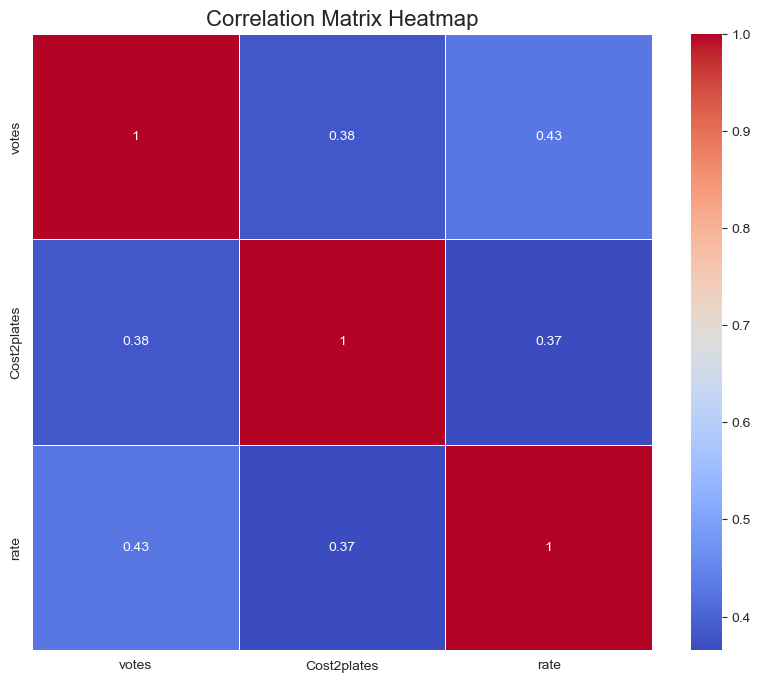

In [13]:
# Create a colored heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

Interpretation: 
1. Votes vs. Cost2plates: There is a moderate positive relationship (0.380882) between the number of votes a restaurant receives and the cost for two people.
2. Votes vs. Rate: There is a moderate positive relationship (0.428384) between the number of votes a restaurant receives and its overall rating.
3. Cost2plate vs. Rate: There is a moderate positive relationship (0.365676) between the cost for two people and the overall rating of a restaurant.

In [17]:
# Save figure
plt.savefig("correlation_heatmap.png")

<Figure size 640x480 with 0 Axes>

In [16]:
# current dir
cwd = os.getcwd()
cwd

'C:\\Users\\honoc\\DataspellProjects\\ZomatoProject'

4.	Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
o	Discuss the output in a markdown cell.


In [18]:
# Select the variables with the strongest correlation
x_variable = 'votes'
y_variable = 'rate'

Text(38.625, 0.5, 'rate')

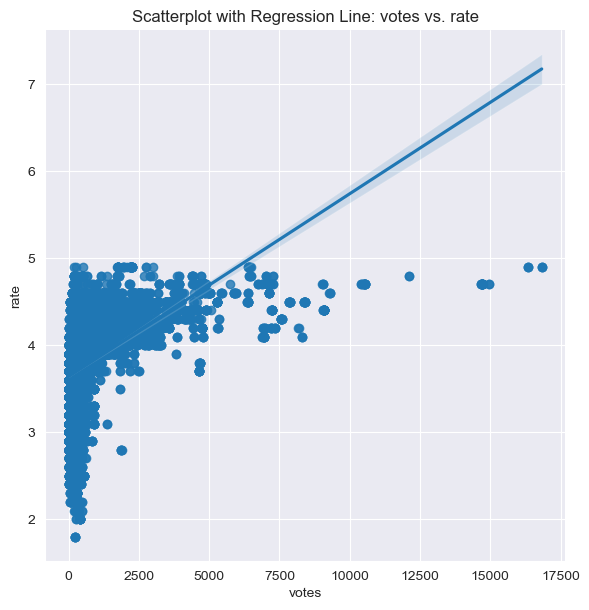

In [20]:
# Create a scatterplot with a regression line
scatterplot = sns.lmplot(x=x_variable, y=y_variable, data=df, height=6)
plt.title(f'Scatterplot with Regression Line: {x_variable} vs. {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)

In [21]:
# Save the scatterplot figure
scatterplot.savefig('scatterplot.png')

In [22]:
cwd = os.getcwd()
cwd

'C:\\Users\\honoc\\DataspellProjects\\ZomatoProject'

The scatterplot suggests that there is a positive relationship between votes and rate, the regression line slopes upwards, indicating that as the rate increases, the voters also tend to increase.

5.	Create a pair plot of the entire data set.
o	Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


In [23]:
# Select variables for the pair plot
selected_variables

['votes', 'Cost2plates', 'rate']

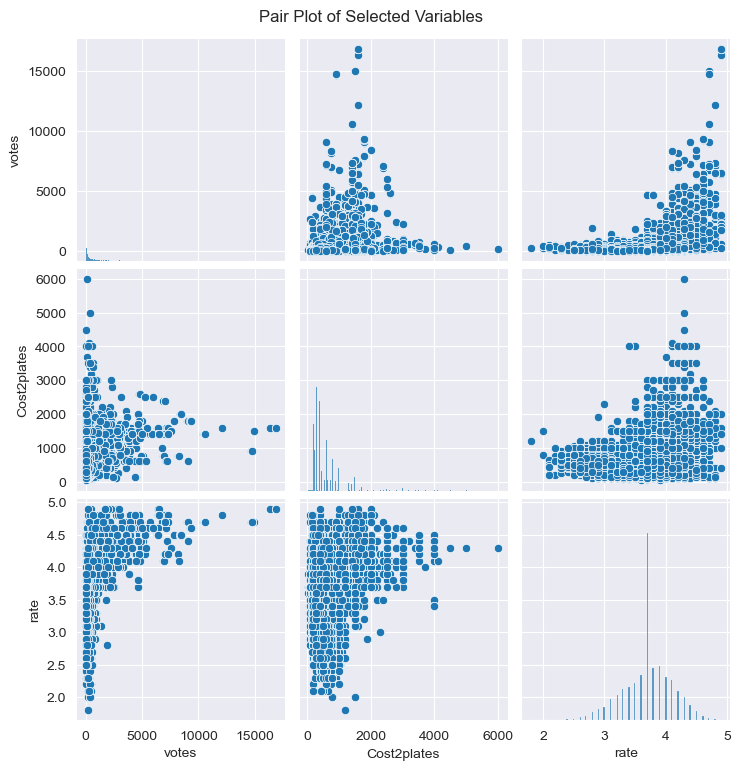

In [24]:
# Create a pair plot
sns.pairplot(df[selected_variables])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

1. votes vs. Cost2plates:
- Distribution: The scatterplot shows a spread of points, suggesting varying costs and votes.
- Further Exploration: Explore if there's a concentration of popular restaurants (high votes) within specific cost ranges. This could indicate whether customers prefer certain price points.

2. votes vs. rate:
- Distribution: The scatterplot reveals a scattered distribution, indicating diverse ratings for different levels of votes.
- Further Exploration: Investigate if there's a correlation between the number of votes and higher ratings. Understanding the relationship can help identify factors contributing to higher-rated restaurants.

3. Cost2plates vs. rate:
- Distribution: The scatterplot displays points across different cost ranges and ratings.
- Further Exploration: Examine if there's a discernible pattern regarding customer satisfaction concerning cost. Are higher-rated restaurants associated with specific cost brackets?

6.	Create a categorical plot and interpret the results.

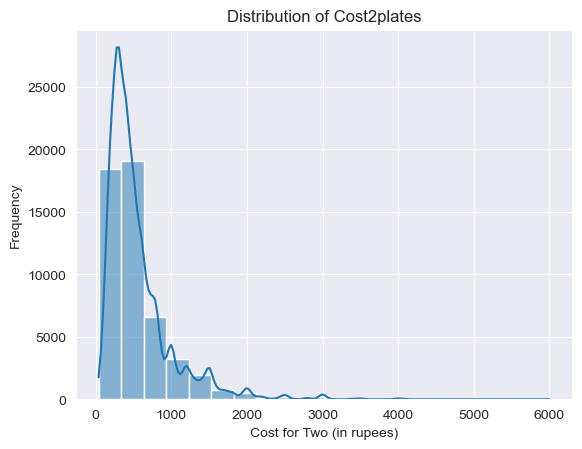

In [25]:
# Use a histogram to visualize the distribution of the "Cost2plates" variable
sns.histplot(df['Cost2plates'], bins=20, kde=True)
plt.title('Distribution of Cost2plates')
plt.xlabel('Cost for Two (in rupees)')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Create categories based on cost ranges
df.loc[df['Cost2plates'] < 1000, 'Cost Category'] = 'Low Cost'
df.loc[(df['Cost2plates'] >= 1000) & (df['Cost2plates'] < 2500), 'Cost Category'] = 'Medium Cost'
df.loc[df['Cost2plates'] >= 2500, 'Cost Category'] = 'High Cost'

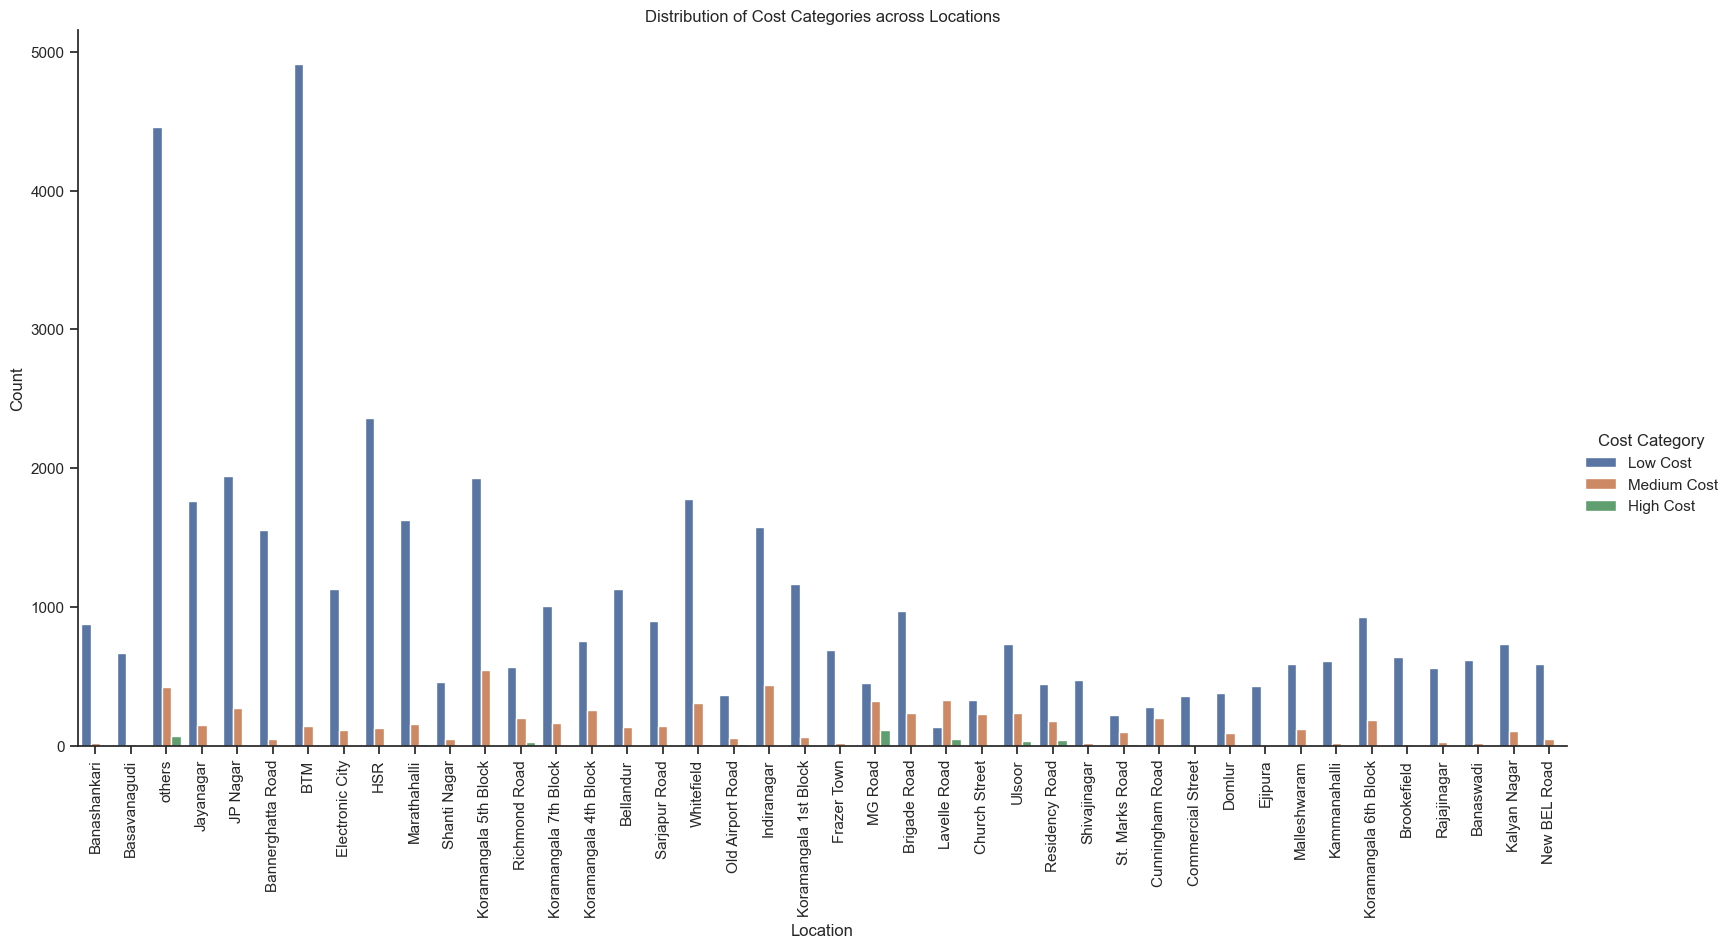

In [38]:
# Visualize the categorical plot
sns.set(style="ticks")
g = sns.catplot(x="location", hue="Cost Category", data=df, kind="count", height=8, aspect=2)
g.set_xticklabels(rotation=90)
plt.title('Distribution of Cost Categories across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [39]:
# Save the categorical plot as an image file
g.savefig('categorical_plot_cost_categories.png')# Save the categorical plot as an image file


Dominant Cost Category: "Low Cost" restaurants are the most numerous across all locations, followed by "Medium Cost" and then "High Cost".

7.	Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Correlation heatmap: Identifies relationships between votes, cost, ratings, helping understand the popularity and preferences in different neighbourhoods.
Pair Plot: Explores the distribution of votes and ratings across locations, as well as gaps and growth opportunities based on ratings, votes, and cost.
Categorical Plot: illustrates cost category distribution in different locations, as well as for marketing optimization.
Scatterplot examines the correlation between popularity (votes) and ratings.

Questions:
1. Are there specific cuisines or restaurant types associated with higher ratings across different neighbourhoods?
2. Is there acorrelation between the availability of online ordering services and the popularity of specific cuisines or cost categories?

8.	Define any hypotheses that you can at this point. You’ll be testing these later on.

1. Hypothesis: Restaurants offering online ordering services will have higher overall ratings.
2. Hypothesis: The availability of table booking options is positively correlated with restaurant ratings.